In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
dataset_renaming = {
    "mendelian_matched_9": "Mendelian traits",
    "gwas_matched_9": "Complex traits",
}

subset_renaming = {
    "all": "All",
    "non_coding": "Non-coding",
}

In [70]:
datasets = [
    "mendelian_matched_9",
    "gwas_matched_9",
]

subsets = [
    "all",
    "non_coding",
]

models = [
    "CADD",
    "GPN-MSA",
    "Borzoi",
    "CADD+GPN-MSA",
    "CADD+Borzoi",
    "GPN-MSA+Borzoi",
    "CADD+GPN-MSA+Borzoi",
]

def get_model_path(dataset, subset, model):
    return (
        f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/"
        f"{subset}/{model}.LogisticRegression.chrom.csv"
    )

In [71]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for model in models:
            path = get_model_path(dataset, subset, model)
            df = pd.read_csv(path).iloc[0]
            rows.append([
                dataset_renaming.get(dataset, dataset),
                subset_renaming.get(subset, subset),
                model,
                df["score"],
                df["se"]]
            )
df = pd.DataFrame(rows, columns=["dataset", "subset", "model", "AUPRC", "se"])
df

,dataset,subset,model,AUPRC,se
0,Mendelian traits,All,CADD,0.925318,0.015980
1,Mendelian traits,All,GPN-MSA,0.783386,0.029411
2,Mendelian traits,All,Borzoi,0.292325,0.037569
3,Mendelian traits,All,CADD+GPN-MSA,0.925924,0.016047
4,Mendelian traits,All,CADD+Borzoi,0.878795,0.014586
5,Mendelian traits,All,GPN-MSA+Borzoi,0.768730,0.025900
6,Mendelian traits,All,CADD+GPN-MSA+Borzoi,0.878692,0.014745
7,Mendelian traits,Non-coding,CADD,0.856007,0.029585
8,Mendelian traits,Non-coding,GPN-MSA,0.691219,0.064166
9,Mendelian traits,Non-coding,Borzoi,0.490801,0.033037


In [96]:
def plot_subset(subset):
    df_s = df.query("subset == @subset")
    if subset == "All":
        df_s = df_s[~df_s.model.isin(["Borzoi"])]

    g = sns.FacetGrid(
        df_s,
        col="dataset",
        sharex="col",
        sharey=False,
        height=2.2,
        aspect=1.5,
    )

    def my_boxplot(data, **kwargs):
        data = data.sort_values("AUPRC", ascending=False)
        ax = plt.gca()
        g = sns.barplot(
            data=data,
            y="model",
            x="AUPRC",
            ax=ax,
            #palette=palette,
            color="gray",
        )
        ax.errorbar(
            x=data["AUPRC"],
            y=data["model"],
            xerr=data["se"],
            fmt='none',
            color="black",
        )

    g.map_dataframe(my_boxplot)
    #g.figure.subplots_adjust(wspace=2)

    g.set(
        ylabel="",
        xlim=0.1,
    )
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    plt.savefig(f"../../results/plots/performance_ensemble_{subset}.pdf", bbox_inches="tight")

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

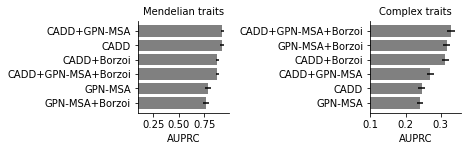

In [97]:
plot_subset("All")

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

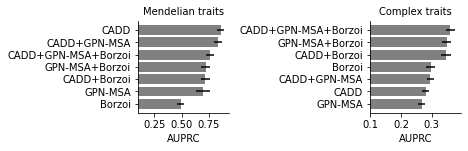

In [98]:
plot_subset("Non-coding")